In [37]:
library(reticulate)
library(tidyverse)
library(text)

IRdisplay::display_html('<style>.container { width:100% !important; }</style>')

# Install Scattertext into a conda environment (in the notebook, the environment's name is py38).
# Ensure that you install Scattertext using pip (and not conda) after you've created your virtual environment

# For example, you may create a new virtual envirnoment and install Scattertext from the command line as follows:
# $ conda create -n py38 python=3.8
# $ source activatep py38
# (py38) $ pip install scattertext

use_condaenv("py38", required = TRUE)
st <- import("scattertext")

# Ensure the version Scattertext is at lest 0.0.2.74
stopifnot(st['__version__'] >= '0.0.2.74')

Let's examine the example dataset used in R-Text. It consists of two passages, each written by a crowdsourced worker of a stated age and gender, in a 
process described in https://www.tandfonline.com/doi/full/10.1080/00223891.2020.1737093.

In short, the dataset contains passages elicted from subjects reptaining to harmony and satisfaction in life, and each passage is accompanied by lists of "words" associated with each user and appears to characterize their hamony and satsitiction levels. It's not clear how these list were collected, but form the basis of the R-Text visualization. It covers 40 users, and for a total of 80 texts.

In [42]:
Language_based_assessment_data_8

harmonywords,satisfactionwords,harmonytexts,satisfactiontexts,hilstotal,swlstotal,age,gender
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
doubt anxious worried fearful distant disconnected private quiet observant questionable,eager pensive unsatisfied hungry ambitious driven focused desiring restless longing,I am not in harmony in my life as much as I would like to be. I would like to be more peaceful and more productive. I want to have a balanced life. I would like to spend more time with my family and be more focused on my goals and where I want to be in life and what I want to achieve.,"I am not satisfied with my life. I am grateful for what I do have and where I am because the situation can always be worse. I want a career and a degree, I want to loose weight and I haven't met these goals yet. So I am not satisfied with my life right now. I feel I can achieve more.",9,5,33,1
transcendent surrender ease peaceful heartfelt loved warm strong comfortable,content anticipation hopeful excited relieved ease controlled focuses energized ready,I am more in Harmony now then I was last week because I finally have gotten a new job and have settled into it. I feel at ease and comfortable knowing that I can help with bills and make an income. My obsessive thoughts about money have subsided and now I feel more at peace with my life. I feel less worry so that I can meditate and do yoga to prepare myself for hard work again and be at peace with interacting with new people and authority again.,I am definitely pretty satisfied right now. Went though several months of being highly disappointing when I was unemployed and now that I'm working I'm very satisfied in knowing I can help with my family's burden. I'm satisfied with my journey in Yoga and incorporating what i've learned in this now busy life. I'm satisfied knowing I can provide and feel that ease knowing I can take care of my child.,26,15,31,1
mindful connected proud enamoured one communion together entwined grounded open,loved healthy hopeful happy successful satisfied humoured educated privileged full,i feel like i am in harmony with life. I seem to be well connected to the people around me. I feel like my connections have been stronger than ever. I am doing well and am successful,i am very much satisfied. I am happily learning and doing the things i want to do with my life. I am doing well in that field.,30,29,20,2
accepting discombobulated scattered rattled unsure unsatisfied anxious nervous sad,lonely lost unsure nervous anxious selfconscious sad down questioning alone,"My thoughts feel scattered, contrived, and contradictory. Nothing in my life makes sense together anymore. I feel like I'm trying to put a puzzle together, but all the pieces come from different sets.",I feel lost. I don't know what I'm doing to do anymore. I'm unsure about my choices and whether or not they will take me down the right path. I don't know if I can be happy and find my place and purpose in this world.,15,10,20,1
love cherished security home dogs plentiful safety present gratitude support,satiated saturated accepted included comfortable comfort secure security happy pleased,"In general I am in harmony. Because my financial needs are not exactly met and my health is somewhat strained, I find it difficult to say I am in harmony. I could use more health, less pain, and more money to feel like I truly have a balanced life. Over all my disharmony is a temporary effect of a long term success (being in school full time), and my health is not terminal so I can take grate solace in knowing that one day my circumstances will change and things have the potential to be more harmonious.","In general I am very satisfied. I would benefit from more finical security, because it is currently difficult to pay all of my bills while I am a full-time student. Even though I have some money concerns my basic needs are taken care of and life is very satisfying. I have plenty of time to enjoy life and spend all the quality

Following the *text* documentation, wroduce embeddings on all character columns using bert-base-uncased

In [3]:
Language_based_assessment_data_8_embed <- textEmbed(Language_based_assessment_data_8)

We can then transform the projections into a term coordinates, and harmony/satisfaction.

In [46]:
df_for_plotting <- textProjection(
    Language_based_assessment_data_8$harmonywords,
    Language_based_assessment_data_8_embed$harmonywords,
    Language_based_assessment_data_8_embed$singlewords_we,
    Language_based_assessment_data_8$hilstotal, 
    Language_based_assessment_data_8$swlstotal
)
head(df_for_plotting, 2)

words,dot.x,p_values_dot.x,n_g1.x,n_g2.x,dot.y,p_values_dot.y,n_g1.y,n_g2.y,n,n.percent,N_participant_responses
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>
accepting,1.050426,0.19214569,-1,1,-0.2559388,0.6982880,-1,1,2,0.005037783,40
agreeing,1.934565,0.07276666,NA,1,0.6183750,0.9078225,NA,1,1,0.002518892,40


We can then use *text* to plot the projection data frame. Again, please refer to the documentation at http://r-text.org/ for more details.

$final_plot

$description
[1] "INFORMATION ABOUT THE PROJECTION words = $ wordembeddings = Information about the embeddings. textEmbedLayersOutput:  model: bert-base-uncased layers: 11 12 . textEmbedLayerAggregation: layers =  11 12 aggregate_layers =  concatenate aggregate_tokens =  mean tokens_select =   tokens_deselect =   single_wordembeddings = Information about the embeddings. textEmbedLayersOutput:  bert-base-uncased layers: 11 12 . textEmbedLayerAggregation: layers =  11 12 aggregate_layers =  concatenate aggregate_tokens =  mean tokens_select =   tokens_deselect =   x = $ y = $ pca =  aggregation =  mean split =  quartile word_weight_power = 1 min_freq_words_test = 0 Npermutations = 10000 n_per_split = 50000 words = Language_based_assessment_data_8 wordembeddings = Information about the embeddings. textEmbedLayersOutput:  model: bert-base-uncased layers: 11 12 . textEmbedLayerAggregation: layers =  11 12 aggregate_layers =  concatenate aggregate_tokens =  mean tokens_select = 

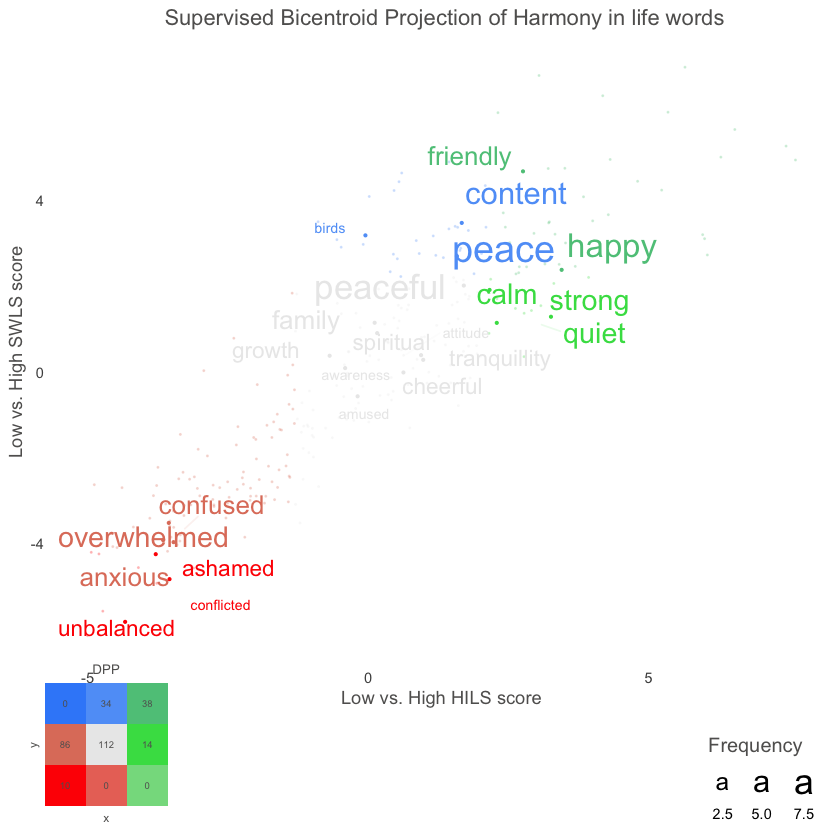

In [45]:
plot <- textProjectionPlot(
  word_data = df_for_plotting,
  y_axes = TRUE,    
  title_top = " Supervised Bicentroid Projection of Harmony in life words",
  x_axes_label = "Low vs. High HILS score",
  y_axes_label = "Low vs. High SWLS score",
  position_jitter_hight = 0.5,
  position_jitter_width = 0.8
)
plot

Next, let's use Scattertext to plot this data. First let's convert the original response data into a format which can be read represented Scattertext. 

This means there should be one row in the data frame for each document, with their Harmony or Statisfication category being in another. Let's keep track 
of harmony/satisfication "words" and subject information in other columns. To minimize confusion, we'll call these "Tags."

Please see https://github.com/jasonkessler/scattertext for an overview of this format and a number of examples of its use.

In [5]:
# Convert Language_based_assessment_data_8 to a scattertext compatible dataframe called assessment8_df.
# Keep the original "words" as the "Tags" column

harmony_data <- Language_based_assessment_data_8 %>% 
 rename(Text=harmonytexts) %>%
 rename(Words=harmonywords) %>%
 select(Text, Words, age, gender) %>%
 add_column(Type = "Harmony")

satisfaction_data <- Language_based_assessment_data_8 %>% 
 rename(Text=satisfactiontexts) %>%
 rename(Words=satisfactionwords) %>%
 select(Text, Words, age, gender) %>%
 add_column(Type = "Satisfaction")

assessment8_df <- bind_rows(list(harmony_data, satisfaction_data))

assessment8_df$Parse <- lapply(
    assessment8_df$Text, 
    st$whitespace_nlp_with_sentences
)

assessment8_df$Tokens <- lapply(
    assessment8_df$Parse, 
    function(x) { lapply(iterate(x), function(word) {word$lower_}) }
)

assessment8_df$Tags <- lapply(
    assessment8_df$Words, function(x) { unlist(strsplit(tolower(x), ' ')) }
)

In [53]:
dim(assessment8_df)
head(assessment8_df, 2)

[1] 80  8

Text,Words,age,gender,Type,Parse,Tokens,Tags
<chr>,<chr>,<int>,<int>,<chr>,<list>,<list>,<list>
I am not in harmony in my life as much as I would like to be. I would like to be more peaceful and more productive. I want to have a balanced life. I would like to spend more time with my family and be more focused on my goals and where I want to be in life and what I want to achieve.,doubt anxious worried fearful distant disconnected private quiet observant questionable,33,1,Harmony,<environment: 0x7f854b5da880>,"i , am , not , in , harmony , in , my , life , as , much , as , i , would , like , to , be , . , i , would , like , to , be , more , peaceful , and , more , productive, . , i , want , to , have , a , balanced , life , . , i , would , like , to , spend , more , time , with , my , family , and , be , more , focused , on , my , goals , and , where , i , want , to , be , in , life , and , what , i , want , to , achieve , .","doubt , anxious , worried , fearful , distant , disconnected, private , quiet , observant , questionable"
I am more in Harmony now then I was last week because I finally have gotten a new job and have settled into it. I feel at ease and comfortable knowing that I can help with bills and make an income. My obsessive thoughts about money have subsided and now I feel more at peace with my life. I feel less worry so that I can meditate and do yoga to prepare myself for hard work again and be at peace with interacting with new people and authority again.,transcendent surrender ease peaceful heartfelt loved warm strong comfortable,31,1,Harmony,<environment: 0x7f8549a91ed0>,"i , am , more , in , harmony , now , then , i , was , last , week , because , i , finally , have , gotten , a , new , job , and , have , settled , into , it , . , i , feel , at , ease , and , comfortable, knowing , that , i , can , help , with , bills , and , make , an , income , . , my , obsessive , thoughts , about , money , have , subsided , and , now , i , feel , more , at , peace , with , my , life , . , i , feel , less , worry , so , that , i , can , meditate , and , do , yoga , to , prepare , myself , for , hard , work , again , and , be , at , peace , with , interacting, with , new , people , and , authority , again , .","transcendent, surrender , ease , peaceful , heartfelt , loved , warm , strong , comfortable"


Now we can make it a Scattertext Corpus object. We'll include the Tags for exch document as "metadata" or non-text-anchored features, and only consider content words as text-anchored features.

In [7]:
assessment8_corpus <- st$CorpusFromParsedDocuments(
    assessment8_df,
    parsed_col = 'Parse',
    category_col = 'Type'
)$build(
)$get_stoplisted_unigram_corpus(
)$use_external_metadata_lists(
    assessment8_df$Tags
)


We'll recreate the plot above shortly, but let's first use Scattertext to explore how passages and tags differ between Harmony and Satisfaction passages.

We can plot a tag frequencies for the two categories on the x- and y-axes, with the y-axis representing the rank of Harmony frequencies and the x-axis Satisfaction.

We can see that words related to "peace" are most associated with Harmony, while words around satiation (e.g., full, hungry, healthy, unsatisfied) are related to Satisfisfaction. "Happy" tends to be the most jointly related term.

Click the plot to see passages labeled with these Tags. You'll see the p-values and plot-projection information associated with each tag as well as users and passages associated with them.

In [66]:
get_custom_term_html <- paste(
    '(function(x) {return "Tag: " + x.term + "<span class=topic_preview>"',
    paste(
        lapply(
            c(
                tuple('Harmony score', 'dot.y'), 
                tuple('Harmony P-val', 'p_values_dot.y'), 
                tuple('Satisfaction score', 'dot.x'),
                tuple('Satisfaction P-val', 'p_values_dot.x')
            ), 
            (function(x) {paste(' +"<br>',x[0],': " + x.etc["',x[1],'"]', sep='')})
        ), 
        collapse = ''
    ),
    '+ "</span>" ;})',
    collapse = ''
)

term_projection <- (df_for_plotting %>%
 remove_rownames %>% 
 column_to_rownames(var="words")
)[assessment8_corpus$get_metadata(), ]

html <- st$produce_scattertext_explorer(
    assessment8_corpus,
    category='Harmony',
    not_category_name='Satisfaction',
    minimum_term_frequency=0, 
    pmi_threshold_coefficient=0,
    width_in_pixels=1000, 
    term_metadata_df=term_projection,    
    use_non_text_features=1,
    get_custom_term_html=get_custom_term_html,
    metadata=paste('Age:', assessment8_df$age, '; Gender:', c("F", "M")[assessment8_df$gender]),
    transform=st$Scalers$dense_rank
) %>% cat(file="harmony_tag_frequency.html")
IRdisplay::display_html('<iframe src="harmony_tag_frequency.html" width=1500, height=700></iframe> ')

Next, we can see word frequencies from the dataset. These correspond to words appearing in the passages themselves.

We can see the clear dominance of the category names, and see the words "life" and "feel" are used frequently in both categories.

Again, the plot is interactive, so feel free to click to explore the contexts of terms.

In [67]:
html <- st$produce_scattertext_explorer(
    assessment8_corpus,
    category='Harmony',
    not_category_name='Satisfaction',
    minimum_term_frequency=0, 
    pmi_threshold_coefficient=0,
    width_in_pixels=1000, 
    metadata=paste('Age:', assessment8_df$age, '; Gender:', c("F", "M")[assessment8_df$gender]),
    transform=st$Scalers$dense_rank
) %>% cat(file="harmony_text_frequency.html")
IRdisplay::display_html('<iframe src="harmony_text_frequency.html" width=1500, height=700></iframe> ')

Next, let's recreate the original *text* projection plot.  We'll first ensure that we limit the Scattertext corpus and term projection to only words with defined coordinates.  Below is a haphazard way of doing that.

In [68]:
# Reindex plotting dataframe by word, ensure only metadata is there
term_projection <- (df_for_plotting %>%
 remove_rownames %>% 
 column_to_rownames(var="words")
)[assessment8_corpus$get_metadata(), ]


# Remove terms which are not in the r-text defined plotting dataframe
assessment8_corpus_clean <- assessment8_corpus$remove_terms(
    union(union(setdiff(assessment8_corpus$get_metadata(), df_for_plotting$words), 
                setdiff(df_for_plotting$words, assessment8_corpus$get_metadata())),
          rownames(term_projection[which(is.na(term_projection$dot.x)),])),
    ignore_absences=1, 
    non_text=1
)

# Reindex plotting dataframe by word, ensure only metadata is there
term_projection <- (df_for_plotting %>%
 remove_rownames %>% 
 column_to_rownames(var="words")
)[assessment8_corpus_clean$get_metadata(), ]

term_projection <- term_projection[grepl("^NA", rownames(term_projection))==F,]


Next, we'll scale the x and y-coordinates for plotting on Scattertext, and color points by their minimum p-value, with highly significant being blue, and less significant being red.

Finally, we'll score each point based on how associated with both harmony and satisfication (e.g., their aligned point along the 45 degree diagonal). List those scores on the right-hand side of the plot.

In [69]:
# Manually project the computed x and y axes as dot.x.scale and dot.y.scale
# Color the points by their max p-value

scale.cords <- function (x, y) {
    scale_min <- min(x, y, na.rm = TRUE)
    scale_max <- max(x, y, na.rm = TRUE)
    x_scaled <- ((x/scale_max * (x > 0) + (x/scale_min) * (x <= 0) * -1) + 1) * 0.5
    y_scaled <- ((y/scale_max * (y > 0) + (y/scale_min) * (y <= 0) * -1) + 1) * 0.5
    out <- list(x_scaled, y_scaled)
    names(out) <- c("x", "y")
    out
}

scaled.coords <- scale.cords(term_projection$dot.x, term_projection$dot.y)


# Color the terms by their minimum p-value
term_projection$min.p.val <- (term_projection %>% mutate(pmax=1-pmax(p_values_dot.y,p_values_dot.x)))$pmax
term_projection$min.p.val <- term_projection$min.p.val/max(term_projection$min.p.val)

# Take the x-axis of the scatterplot rotated 45 degrees clockwise to get the combo scores
x <- term_projection$dot.x
y <- term_projection$dot.y
r <- pi*(-45)/180
x.rot <- x * cos(r) - y * sin(r)
y.rot <- x * sin(r) + y * cos(r)

term_projection$ComboScore <- x.rot


Finally, create and explore the plot.

In [72]:
# This function displays information after clicking on a term. Note that the term_frequency dataframe is stored
# in the `etc` subobject in each term's Javascript object.
get_custom_term_html <- paste(
    '(function(x) {return "Tag: " + x.term + "<span class=topic_preview>"',
    paste(
        lapply(
            c(
                tuple('Harmony score', 'dot.y'), 
                tuple('Harmony P-val', 'p_values_dot.y'), 
                tuple('Satisfaction score', 'dot.x'),
                tuple('Satisfaction P-val', 'p_values_dot.x')
            ), 
            (function(x) {paste(' +"<br>',x[0],': " + x.etc["',x[1],'"].toFixed(5)', sep='')}) 
        ), 
        collapse = ''
    ),
    '+ "</span>" ;})',
    collapse = ''
)

# Note that ox and oy are each tag's original plot positions, corresponding to dot.x and dot.y.
get_tooltip_content <- '(function(d) {return d.term + "<br/>Harmony score: "+ d.ox.toFixed(5) +"<br/>Satisfaction score: " + d.oy.toFixed(5)})'

html <- st$produce_scattertext_explorer(
    assessment8_corpus_clean,
    category='Satisfaction',
    not_category_name='Harmony',
    minimum_term_frequency=0, 
    pmi_threshold_coefficient=0,
    width_in_pixels=1000, 
    use_non_text_features=1,
    term_metadata_df=term_projection,
    scores=term_projection$score,
    original_x=term_projection$dot.x,
    original_y=term_projection$dot.y,
    x_coords=scaled.coords$x,
    y_coords=scaled.coords$y,
    use_global_scale=1,
    color_func= '(function(d) {return d3.interpolateRdYlBu(d.etc["min.p.val"])})',
    metadata=paste('Age:', assessment8_df$age, '; Gender:', c("F", "M")[assessment8_df$gender], '; Tags:', assessment8_df$Tags),
    get_tooltip_content=get_tooltip_content,
    y_label='Low vs High HILS score',
    x_label='Low vs High SWLS score',
    get_custom_term_html=get_custom_term_html,
    show_axes_and_cross_hairs=1,
    show_diagonal=1,
    use_full_doc=1,
    show_top_terms=1,
    header_names=py_dict(
        list("upperHeaderName", "lowerHeaderName"), 
        list("Top Satisfaction/Harmony", "Bottom Satisfaction/Harmony")
    ),
    header_sorting_algos=py_dict(
        list("upper", "lower"), list(
            "((a,b) => b.etc.ComboScore - a.etc.ComboScore)", 
            "((a,b) => a.etc.ComboScore - b.etc.ComboScore)"
        )
    )
) 

paste('<h2 align=center>Supervised Bicentroid Projection of Harmony in life words</h2>', html, sep=' ') %>% cat(file="harmony_rtext.html")

IRdisplay::display_html('<iframe src="harmony_rtext.html" width=1500, height=700></iframe>')